---
# Grid Theory

Konstantin Holzhausen (konstantin.holzhausen@fys.uio.no)

7th July 2022

---
This notebook is commenting on the plane wave composition of [hexagonal Grid Cell ratemap patterns](https://onlinelibrary.wiley.com/doi/10.1002/hipo.20244). In particular, we analytically study the relationships between the symmetries of the pattern-generating plane waves and the symmetries of the generated pattern. We do that by comprehensively studying the relationship between the $\vec{k}$-vectors (wave vectors) of the plane waves and the **Primitive Basis Vectors** of the hexagonal lattice formed by the peaks of the generated pattern.  

## 2D Hexagonal Lattice, Basis Vectors, Primitive Basis, Unit Cells and the Wigner-Seitz-Cell

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def rotmat(theta: float, degrees: bool=True):
    if degrees:
        theta = theta*np.pi / 180.
    ct = np.cos(theta) # cos(theta)
    st = np.sin(theta) # sin(theta)
    return np.array([[ct, -st], [st, ct]])

In [4]:
# define matrix translating rotations around 60 degrees counter clock-wise
rot60 = rotmat(60.)

# primitive basis vectors of hexagonal grid
a_0 = np.array([1., 0.])
a_1 = rot60 @ a_0

(-5.5, 5.5, -5.5, 5.5)

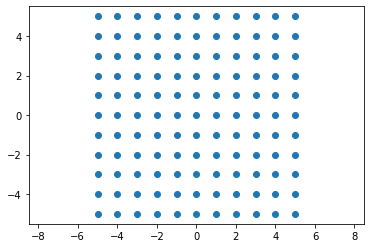

In [18]:
# draw grid

x = np.arange(-5, 5 + 1)
y = np.arange(-5, 5 + 1)
xv, yv = np.meshgrid(x, y)
grid = np.stack([xv, yv], axis=-1)

hex_grid = grid[:, 0]*a_0 + grid[:, 1]*a_1

fig, ax = plt.subplots()
ax.scatter(*grid.T)
ax.axis("equal")

In [19]:
hex_grid

array([[-7.        , -4.33012702],
       [-7.        , -3.46410162],
       [-7.        , -2.59807621],
       [-7.        , -1.73205081],
       [-7.        , -0.8660254 ],
       [-7.        ,  0.        ],
       [-7.        ,  0.8660254 ],
       [-7.        ,  1.73205081],
       [-7.        ,  2.59807621],
       [-7.        ,  3.46410162],
       [-7.        ,  4.33012702]])